# Problem :
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 2. Import the Dataset

In [3]:
salary_data = pd.read_csv('Salary_Data.csv')

# 3. Data Understanding

## 3.1 Initial Analysis

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
salary_data.shape

(30, 2)

In [7]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


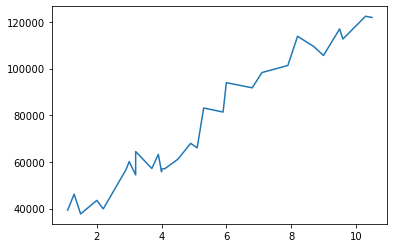

In [9]:
plt.plot(salary_data['YearsExperience'],salary_data['Salary'])


<AxesSubplot:>

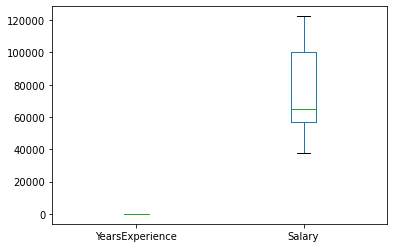

In [12]:
salary_data.boxplot(grid=False)

<AxesSubplot:>

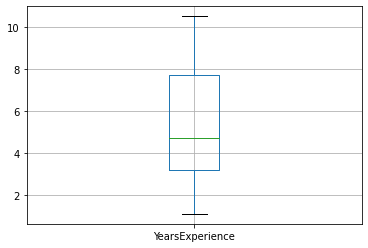

In [18]:
salary_data.drop('Salary',axis=1).boxplot()

## 3.2 Assumptions Check

### 3.2.1 linearity Test

Text(0.5, 1.0, 'Years of Experience vs Salary')

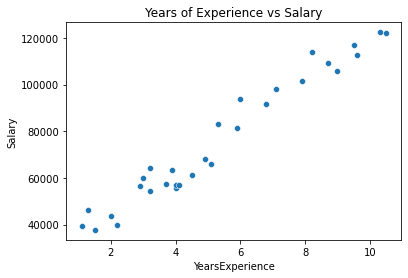

In [9]:
sns.scatterplot(x=salary_data['YearsExperience'],y=salary_data['Salary'],data=salary_data)
plt.title('Years of Experience vs Salary')

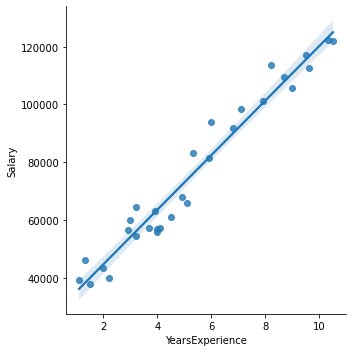

In [10]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)

In [11]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
corr_coeff,p_value = pearsonr(x=salary_data['YearsExperience'],y=salary_data['Salary'])
print(corr_coeff.round(2),p_value)

0.98 1.1430681092271564e-20


##### As corr_coeff = 0.98, There is very high positive correlation
The lower (p), the higher the probability that our observed correlation has not occurred due to coincidence.

In [13]:
sp_corr,p_value = spearmanr(salary_data['YearsExperience'],salary_data['Salary'])
print(sp_corr.round(2),p_value)

0.96 1.466992893885873e-16


here, we can not reject that data possesses linearity.

### 3.2.2 Normality Test

In [43]:
type(salary_data['YearsExperience'])

pandas.core.series.Series

In [9]:
salary_data['YearsExperience'].shape

(30,)

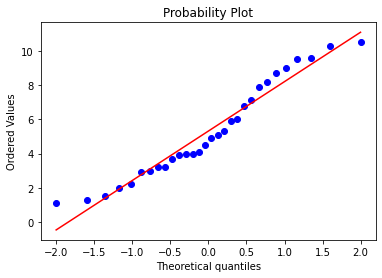

In [14]:
stats.probplot(salary_data['YearsExperience'],plot=plt)
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

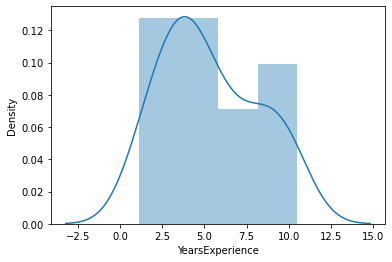

In [15]:
sns.distplot(salary_data['YearsExperience'])

##### Normality Test Failed.

# 4. Model Building

In [20]:
#X = salary_data.drop(['Salary'],axis=1)
#y = salary_data[['Salary']]
X = salary_data['YearsExperience'].values.reshape(-1,1)
y = salary_data['Salary'].values.reshape(-1,1)

In [21]:
X.shape,y.shape

((30, 1), (30, 1))

In [22]:
linear_reg = LinearRegression()

# 5. Model Training || 6. Model Testing || 7. Model Evaluation

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24, 1), (6, 1))

In [25]:
model_1 = linear_reg.fit(X_train,y_train)

In [26]:
print('The intercept value of model_1 is {}.'.format(model_1.intercept_))
print('The coefficient(slope) value of model_1 is {}.'.format(model_1.coef_))

The intercept value of model_1 is [25321.58301178].
The coefficient(slope) value of model_1 is [[9423.81532303]].


In [27]:
model_1_pred = model_1.predict(X_test)
model_1_pred.round(2)

array([[115790.21],
       [ 71498.28],
       [102596.87],
       [ 75267.8 ],
       [ 55477.79],
       [ 60189.7 ]])

In [28]:
model_1_act_vs_pred = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':model_1_pred.flatten()})
model_1_act_vs_pred

,Actual,Predicted
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


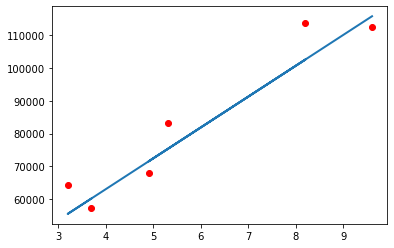

In [29]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,model_1_pred,linewidth=2)

In [30]:
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_1_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_1_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_1_pred)))
print("R^2 Score              :", r2_score(y_test, model_1_pred))

Mean Absolute Error    : 6286.453830757749
Mean Squared Error     : 49830096.85590839
Root Mean Squared Error: 7059.04362190151
R^2 Score              : 0.9024461774180497


# Data Transformation

### LOG Transformation

In [31]:
X_log = np.log(salary_data['YearsExperience']).values.reshape(-1,1)

In [32]:
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log,y,test_size=0.20,random_state=42)

The intercept value of model_3 is [16808.04207062].
The coefficient(slope) value of model_3 is [[39297.91674992]].
Mean Absolute Error    : 7714.638101223965
Mean Squared Error     : 84567607.74831854
Root Mean Squared Error: 9196.064796874723
R^2 Score              : 0.8344395471211845


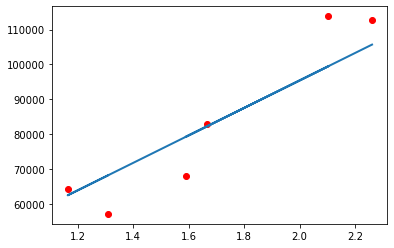

In [33]:
model_3 = linear_reg.fit(X_train_log,y_train)
print('The intercept value of model_3 is {}.'.format(model_3.intercept_))
print('The coefficient(slope) value of model_3 is {}.'.format(model_3.coef_))

model_3_pred = model_3.predict(X_test_log)
model_3_pred.round(2)

model_3_act_vs_pred = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':model_3_pred.flatten()})
model_3_act_vs_pred

plt.scatter(X_test_log,y_test,color = 'red')
plt.plot(X_test_log,model_3_pred,linewidth=2)

print('Mean Absolute Error    :', mean_absolute_error(y_test, model_3_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_3_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_3_pred)))
print("R^2 Score              :", r2_score(y_test, model_3_pred))

In [34]:
X_1 = pd.Series(map(lambda x:[x], X_log)).apply(lambda x:x[0])

In [35]:
type(X_1)

pandas.core.series.Series

In [36]:
X_1.shape

(30,)

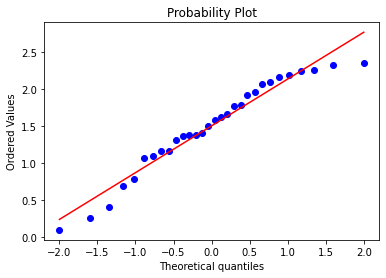

In [37]:
stats.probplot(np.log(salary_data['YearsExperience']),plot=plt)
plt.show()

### EXPONENTIAL Transformation

In [38]:
X_exp = ((salary_data['YearsExperience'])**(1/1.2)).values.reshape(-1,1)

X_train_exp, X_test_exp, y_train, y_test = train_test_split(X_exp,y,test_size=0.20,random_state=42)

The intercept value of model_ is [17166.39138225].
The coefficient(slope) value of model_ is [[14799.32107012]].
Mean Absolute Error    : 6139.3774222428765
Mean Squared Error     : 46618965.44954007
Root Mean Squared Error: 6827.808246395037
R^2 Score              : 0.9087327022949734


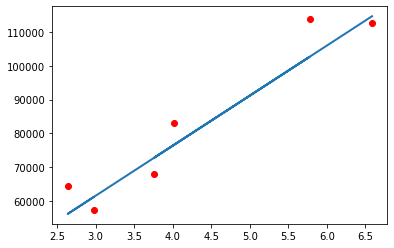

In [39]:
X_train_exp, X_test_exp, y_train_, y_test_ = train_test_split(X_exp,y,test_size=0.20,random_state=42)
model_6 = linear_reg.fit(X_train_exp,y_train_)
print('The intercept value of model_ is {}.'.format(model_6.intercept_))
print('The coefficient(slope) value of model_ is {}.'.format(model_6.coef_))

model_6_pred = model_6.predict(X_test_exp)
model_6_pred.round(2)

model_6_act_vs_pred = pd.DataFrame({'Actual':y_test_.flatten(),'Predicted':model_6_pred.flatten()})
model_6_act_vs_pred

plt.scatter(X_test_exp,y_test_,color = 'red')
plt.plot(X_test_exp,model_6_pred,linewidth=2)

print('Mean Absolute Error    :', mean_absolute_error(y_test_, model_6_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test_, model_6_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_, model_6_pred)))
print("R^2 Score              :", r2_score(y_test_, model_6_pred))

In [40]:
a == salary_data['YearsExperience']

NameError: name 'a' is not defined

In [ ]:
a = ((salary_data['YearsExperience'])**(1/1.2))
stats.probplot(a,plot=plt)
plt.show()

### RECIPROCAL Transformation

In [41]:
X_reci = np.reciprocal(salary_data['YearsExperience']).values.reshape(-1,1)

The intercept value of model_9 is [102904.22592717].
The coefficient(slope) value of model_9 is [[-98626.5332809]].
Mean Absolute Error    : 14280.569970973324
Mean Squared Error     : 261574833.360252
Root Mean Squared Error: 16173.2752823988
R^2 Score              : 0.4879073793631691


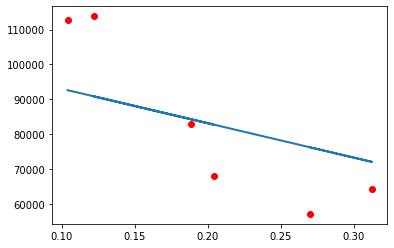

In [42]:
X_train_reci, X_test_reci, y_train_, y_test_ = train_test_split(X_reci,y,test_size=0.20,random_state=42)
model_9 = linear_reg.fit(X_train_reci,y_train_)
print('The intercept value of model_9 is {}.'.format(model_9.intercept_))
print('The coefficient(slope) value of model_9 is {}.'.format(model_9.coef_))

model_9_pred = model_9.predict(X_test_reci)
model_9_pred.round(2)

model_9_act_vs_pred = pd.DataFrame({'Actual':y_test_.flatten(),'Predicted':model_9_pred.flatten()})
model_9_act_vs_pred

plt.scatter(X_test_reci,y_test_,color = 'red')
plt.plot(X_test_reci,model_9_pred,linewidth=2)

print('Mean Absolute Error    :', mean_absolute_error(y_test_, model_9_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test_, model_9_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_, model_9_pred)))
print("R^2 Score              :", r2_score(y_test_, model_9_pred))

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([0.0952381 , 0.09708738, 0.10416667, 0.10526316, 0.11111111,
         0.11494253, 0.12195122, 0.12658228, 0.14084507, 0.14705882,
         0.16666667, 0.16949153, 0.18867925, 0.19607843, 0.20408163,
         0.22222222, 0.24390244, 0.25      , 0.25      , 0.25641026,
         0.27027027, 0.3125    , 0.3125    , 0.33333333, 0.34482759,
         0.45454545, 0.5       , 0.66666667, 0.76923077, 0.90909091])),
 (0.1859505020436457, 0.2728247912877455, 0.8814888127686847))

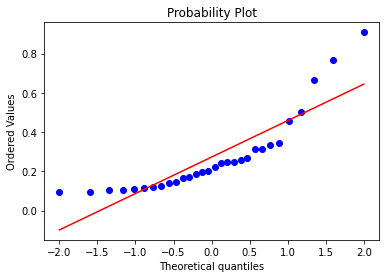

In [43]:
stats.probplot(np.reciprocal(salary_data['YearsExperience']),plot = plt)

### BOX-COX Transformation

In [44]:
X_boxcox,param = stats.boxcox(salary_data['YearsExperience'])

X_boxcox1 = X_boxcox.reshape(-1,1)

The intercept value of model_12 is [25150.44013923].
The coefficient(slope) value of model_12 is [[21753.2053967]].
Mean Absolute Error    : 6292.432424925514
Mean Squared Error     : 50443278.02544287
Root Mean Squared Error: 7102.343136278539
R^2 Score              : 0.9012457348984148


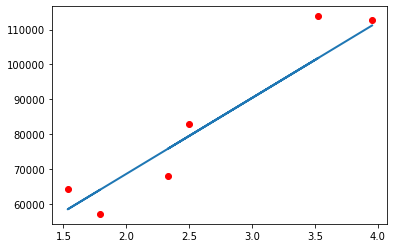

In [45]:
X_train_boxcox, X_test_boxcox, y_train_, y_test_ = train_test_split(X_boxcox1,y,test_size=0.20,random_state=42)
model_12 = linear_reg.fit(X_train_boxcox,y_train_)
print('The intercept value of model_12 is {}.'.format(model_12.intercept_))
print('The coefficient(slope) value of model_12 is {}.'.format(model_12.coef_))

model_12_pred = model_12.predict(X_test_boxcox)
model_12_pred.round(2)

model_12_act_vs_pred = pd.DataFrame({'Actual':y_test_.flatten(),'Predicted':model_12_pred.flatten()})
model_12_act_vs_pred

plt.scatter(X_test_boxcox,y_test_,color = 'red')
plt.plot(X_test_boxcox,model_12_pred,linewidth=2)

print('Mean Absolute Error    :', mean_absolute_error(y_test_, model_12_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test_, model_12_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_, model_12_pred)))
print("R^2 Score              :", r2_score(y_test_, model_12_pred))

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([0.09740799, 0.27867434, 0.44529646, 0.81497041, 0.94851528,
         1.36999425, 1.42546504, 1.53346054, 1.53346054, 1.78831566,
         1.88496821, 1.93228236, 1.93228236, 1.9789564 , 2.15970966,
         2.33190438, 2.41513137, 2.49659858, 2.7314119 , 2.76926113,
         3.06042098, 3.16476   , 3.43177826, 3.52808931, 3.68443407,
         3.77589926, 3.9247231 , 3.9539719 , 4.15422159, 4.21006456])),
 (1.224090094125149, 2.3252143300676615, 0.9887137099604657))

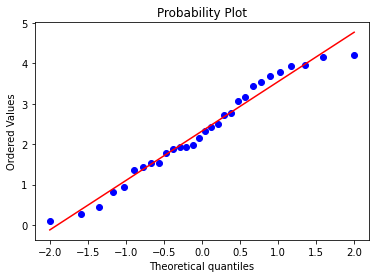

In [46]:
stats.probplot(X_boxcox,plot = plt)

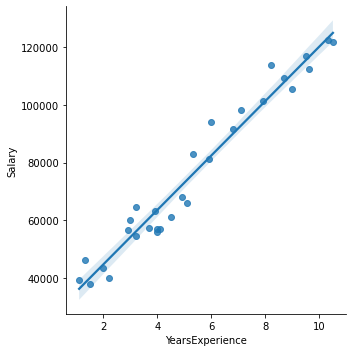

In [47]:

sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)

# Choose the Best Model

In [48]:
print('model_1')
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_1_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_1_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_1_pred)))
print("R^2 Score              :", r2_score(y_test, model_1_pred))

print('model_3')
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_3_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_3_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_3_pred)))
print("R^2 Score              :", r2_score(y_test, model_3_pred))

print('model_6')
print('Mean Absolute Error    :', mean_absolute_error(y_test_, model_6_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test_, model_6_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_, model_6_pred)))
print("R^2 Score              :", r2_score(y_test_, model_6_pred))

print('model_9')
print('Mean Absolute Error    :', mean_absolute_error(y_test_, model_9_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test_, model_9_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_, model_9_pred)))
print("R^2 Score              :", r2_score(y_test_, model_9_pred))

print('model_12')
print('Mean Absolute Error    :', mean_absolute_error(y_test_, model_12_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test_, model_12_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_, model_12_pred)))
print("R^2 Score              :", r2_score(y_test_, model_12_pred))

model_1
Mean Absolute Error    : 6286.453830757749
Mean Squared Error     : 49830096.85590839
Root Mean Squared Error: 7059.04362190151
R^2 Score              : 0.9024461774180497
model_3
Mean Absolute Error    : 7714.638101223965
Mean Squared Error     : 84567607.74831854
Root Mean Squared Error: 9196.064796874723
R^2 Score              : 0.8344395471211845
model_6
Mean Absolute Error    : 6139.3774222428765
Mean Squared Error     : 46618965.44954007
Root Mean Squared Error: 6827.808246395037
R^2 Score              : 0.9087327022949734
model_9
Mean Absolute Error    : 14280.569970973324
Mean Squared Error     : 261574833.360252
Root Mean Squared Error: 16173.2752823988
R^2 Score              : 0.4879073793631691
model_12
Mean Absolute Error    : 6292.432424925514
Mean Squared Error     : 50443278.02544287
Root Mean Squared Error: 7102.343136278539
R^2 Score              : 0.9012457348984148


# From the above models, model 6(Exp) is the best model for given problem.

# Homoscedascity Check

In [49]:
model_6_error = y - model_6.predict(X_exp)

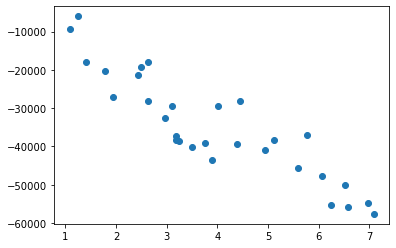

In [50]:
plt.scatter(X_exp,model_6_error)

# Zero Residual Mean Test

It is a plot between **Actual Output Vs Predicted Plot**.

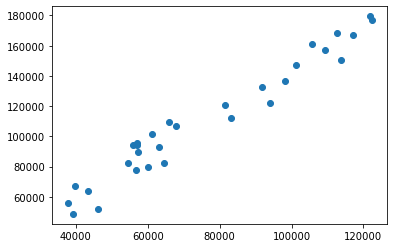

In [51]:
plt.scatter(y,model_6.predict(X_exp))

# From qq plot, boxcox transformed model 12 is good.

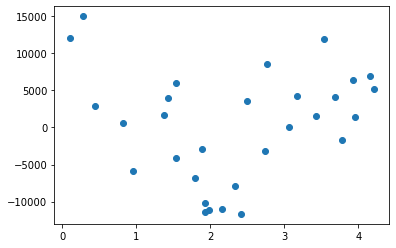

In [52]:
model_12_error = y - model_12.predict(X_boxcox1)
plt.scatter(X_boxcox1,model_12_error)

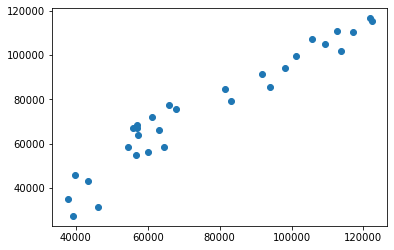

In [53]:
plt.scatter(y,model_12.predict(X_boxcox1))

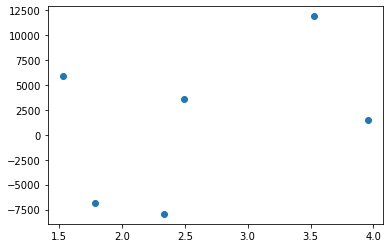

In [61]:
model_12_error_test = y_test - model_12.predict(X_test_boxcox)
plt.scatter(X_test_boxcox,model_12_error_test)

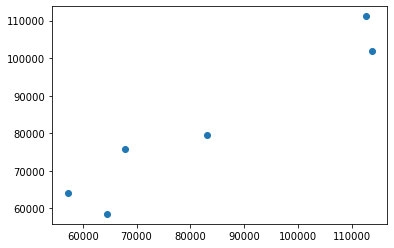

In [65]:
plt.scatter(y_test,model_12.predict(X_test_boxcox))

# Model1

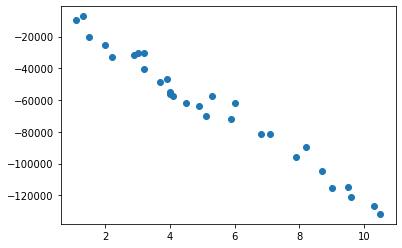

In [54]:
model_1_error = y - model_12.predict(X)
plt.scatter(X,model_1_error)


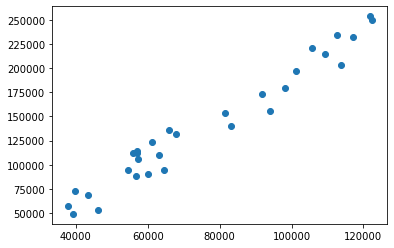

In [55]:
plt.scatter(y,model_1.predict(X))

### Both homoscedascity and zero residual mean tests are failed for model 1.

# Model 3 

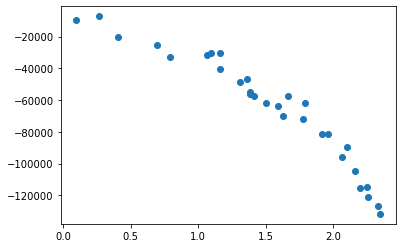

In [68]:
model_3_error = y - model_3.predict(X_log)
plt.scatter(X_log,model_1_error)

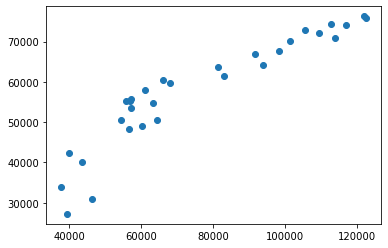

In [69]:
plt.scatter(y,model_3.predict(X_log))

# Both homoscedascity and zero residual mean tests are failed for model 3.

# Model 9

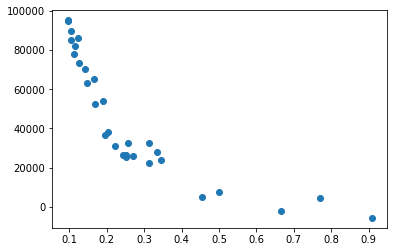

In [73]:
model_9_error = y - model_9.predict(X_reci)
plt.scatter(X_reci,model_9_error)

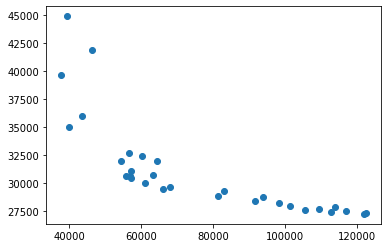

In [70]:
plt.scatter(y,model_9.predict(X_reci))

# Both homoscedascity and zero residual mean tests are failed for model 9.

# By looking at Homoscedascity and zero residual mean plots, model 12 is better model among all the models.

# =============================================================

# Model 12 is the best model.

# ============================================================

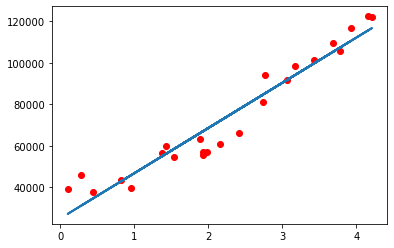

In [68]:
# Vizualization of model. that how it is performing on training data

plt.scatter(X_train_boxcox,y_train_,color = 'red')
plt.plot(X_train_boxcox,model_12.predict(X_train_boxcox),linewidth=2)

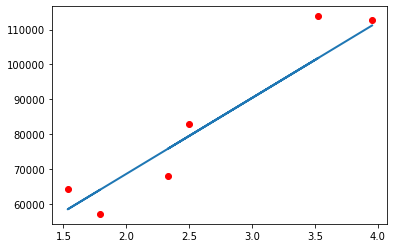

In [69]:
# Vizualization of model. that how it is performing on testing data
plt.scatter(X_test_boxcox,y_test_,color = 'red')
plt.plot(X_test_boxcox,model_12_pred,linewidth=2)
